In [1]:
import matplotlib.pyplot as plt
import numpy as np

import keras

In [2]:
!wget "https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja"

--2020-10-17 14:59:13--  https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja [following]
--2020-10-17 14:59:13--  https://www.dropbox.com/sh/raw/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc20bb51fe2d9efe123019e76e86.dl.dropboxusercontent.com/zip_download_get/Ak2VznMnJOaNXQqQfqoa-orDsB_kEkp6QJtowwY8iU2DzenZo3rN_ebKI_5TfTTYSjsaD1mU18vxZksU2Vmrdvn4YvdMCK84OITbYC6gjkmN_A [following]
--2020-10-17 14:59:14--  https://uc20bb51fe2d9efe123019e76e86.dl.dropboxusercontent.com/zip_download_get/Ak2VznMnJOaNXQqQfqoa-orDsB_kEkp6QJtowwY8iU2DzenZo3rN_ebKI_5TfTTYSjsaD1mU18vxZksU2Vmrdvn4Y

In [3]:
!unzip "AAA8zYti5b5tnyKfcah2Reaja" -d dataset/

Archive:  AAA8zYti5b5tnyKfcah2Reaja
mapname:  conversion of  failed
   creating: dataset/Test/
   creating: dataset/Train/
   creating: dataset/Test/Pikachu/
   creating: dataset/Train/Pikachu/
   creating: dataset/Test/Bulbasaur/
   creating: dataset/Test/Charmander/
   creating: dataset/Train/Bulbasaur/
   creating: dataset/Train/Charmander/
 extracting: dataset/Train/Pikachu/348.jpg  
 extracting: dataset/Train/Pikachu/319.jpg  
 extracting: dataset/Test/Pikachu/2032.jpg  
 extracting: dataset/Test/Pikachu/2011.jpg  
 extracting: dataset/Train/Pikachu/378.jpg  
 extracting: dataset/Train/Pikachu/344.jpg  
 extracting: dataset/Train/Pikachu/379.jpg  
 extracting: dataset/Train/Pikachu/363.jpg  
 extracting: dataset/Train/Pikachu/385.jpg  
 extracting: dataset/Train/Pikachu/302.jpg  
 extracting: dataset/Test/Pikachu/2000.jpg  
 extracting: dataset/Train/Pikachu/313.jpg  
 extracting: dataset/Train/Pikachu/309.jpg  
 extracting: dataset/Train/Pikachu/342.jpg  
 extracting: dataset/Tra

## Image Augmentation/ Data Generator/ Data Loader

In [4]:
from keras.preprocessing import image

In [5]:
train_datagen = image.ImageDataGenerator(rotation_range=20, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range =0.2, 
                         zoom_range=0.3, 
                         horizontal_flip = True,
                         rescale = 1/255.
                         )

In [6]:
val_datagen = image.ImageDataGenerator(rescale = 1/255.)

In [7]:
train_generator = train_datagen.flow_from_directory("dataset/Train", target_size=(100,100) )

Found 304 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}

In [10]:
imgs, labels = next(train_generator)

In [11]:
imgs.shape

(32, 100, 100, 3)

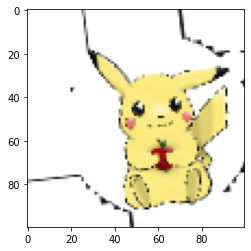

In [14]:
plt.imshow(imgs[1])

In [15]:
labels[1]

array([0., 0., 1.], dtype=float32)

In [17]:
val_generator = val_datagen.flow_from_directory("dataset/Test", target_size=(100,100))

Found 123 images belonging to 3 classes.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense # ANN layers are Dense

In [20]:
model = Sequential()
 # input shape is only required for the first layer
model.add( Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape= (100,100,3)) )
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(filters=64, kernel_size=(3,3), activation='relu') )
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Conv2D(filters=32, kernel_size=(3,3), activation='relu') )
model.add( Flatten() )

model.add( Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 14112)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 4

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
hist = model.fit_generator(train_generator, steps_per_epoch=304//32, epochs=10,
                           validation_data=val_generator, validation_steps = 123//32)

Epoch 1/10
3/9 [=========>....................] - ETA: 4s - loss: 0.9067 - accuracy: 0.5500

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 11s 1s/step - loss: 0.7376 - accuracy: 0.6544 - val_loss: 0.7402 - val_accuracy: 0.7188
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 0.5946 - accuracy: 0.6875 - val_loss: 0.7512 - val_accuracy: 0.6562
Epoch 3/10
9/9 [==============================] - 11s 1s/step - loss: 0.5288 - accuracy: 0.7537 - val_loss: 0.3723 - val_accuracy: 0.8750
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.3484 - accuracy: 0.8382 - val_loss: 0.2720 - val_accuracy: 0.8854
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.3196 - accuracy: 0.9044 - val_loss: 0.2375 - val_accuracy: 0.8750
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.3685 - accuracy: 0.8676 - val_loss: 0.2269 - val_accuracy: 0.9271
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.3060 - accuracy: 0.8860 - val_loss: 0.2561 - val_accuracy: 0.8750
Epoch 8/10
9/9 [=============================

In [25]:
model_history = hist.history

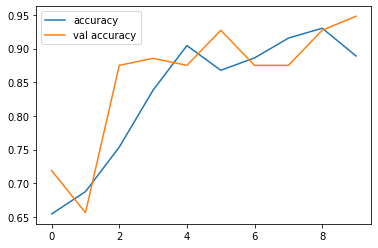

In [29]:
plt.plot(model_history['accuracy'], label="accuracy")
plt.plot(model_history['val_accuracy'], label="val accuracy")
plt.legend()

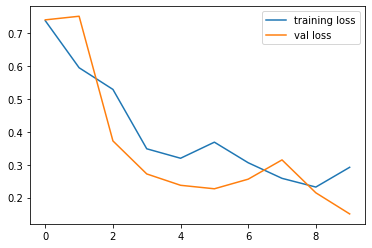

In [30]:
plt.plot(model_history['loss'], label="training loss")
plt.plot(model_history['val_loss'], label="val loss")
plt.legend()

In [31]:
model.evaluate(val_generator)

4/4 [==============================] - 2s 563ms/step - loss: 0.1713 - accuracy: 0.9350


[0.17129600048065186, 0.934959352016449]

# Test for new Image

In [48]:
!wget "https://www.thefactsite.com/wp-content/uploads/2018/04/Bulbasaur-facts.jpg"

--2020-10-17 16:19:41--  https://www.thefactsite.com/wp-content/uploads/2018/04/Bulbasaur-facts.jpg
Resolving www.thefactsite.com (www.thefactsite.com)... 104.27.171.72, 172.67.142.87, 104.27.170.72, ...
Connecting to www.thefactsite.com (www.thefactsite.com)|104.27.171.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40888 (40K) [image/jpeg]
Saving to: ‘Bulbasaur-facts.jpg’

Bulbasaur-facts.jpg 100%[===================>]  39.93K  --.-KB/s    in 0.002s  

2020-10-17 16:19:41 (23.4 MB/s) - ‘Bulbasaur-facts.jpg’ saved [40888/40888]



In [49]:
test_img = image.load_img("./Bulbasaur-facts.jpg", target_size=(100,100) )
test_img = np.array(test_img)/255.

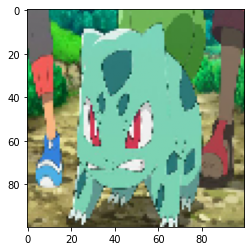

In [50]:
plt.imshow(test_img)

In [51]:
test_img = test_img.reshape(1,100,100,3)
pred = model.predict_classes(test_img)

In [42]:
dic = train_generator.class_indices

In [43]:
rev_dic = { v:k for k,v in dic.items()}

In [52]:
rev_dic[pred[0]]

'Bulbasaur'